In [ ]:
import numpy as np # linear algebra
import pandas as pd 

import matplotlib.gridspec as gridspec
from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV, Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler, scale
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.stats as stats
import sklearn.linear_model as linear_model
import matplotlib.style as style
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import missingno as msno
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [ ]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/kaggle/House Prices_Advanced Regression Techniques/data/train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/kaggle/House Prices_Advanced Regression Techniques/data/test.csv')
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


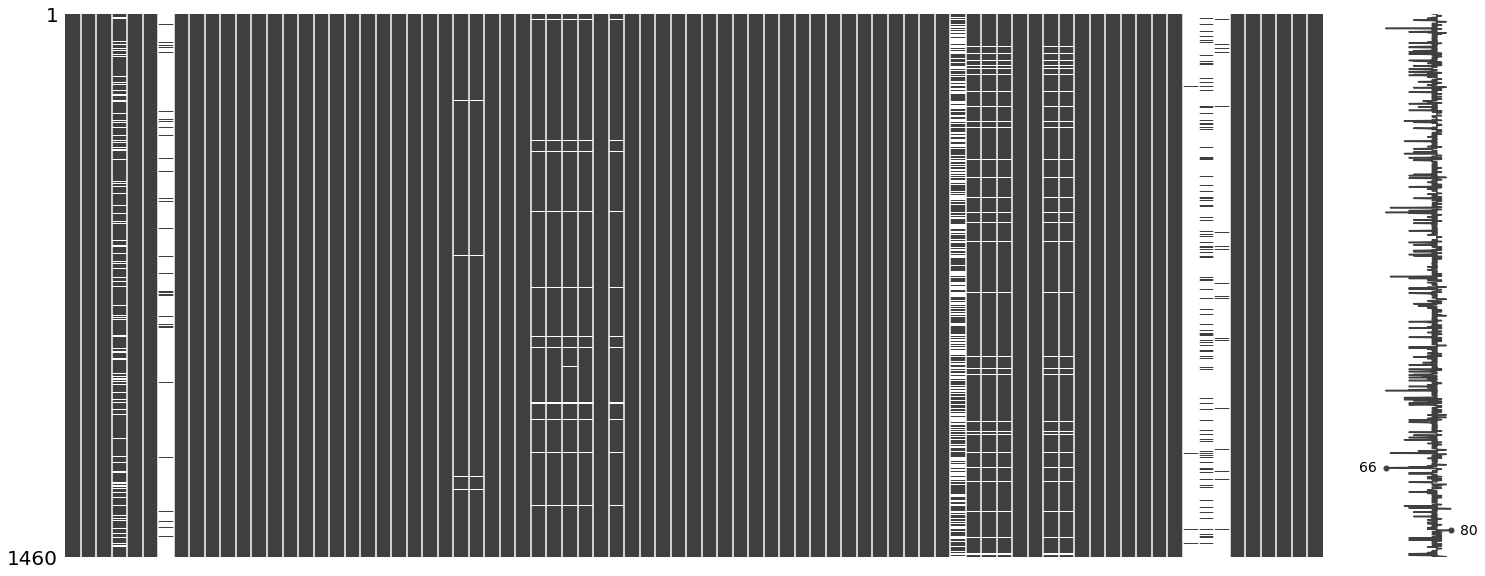

In [ ]:
msno.matrix(train)

In [ ]:
def missing_percentage(df):
  total=df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False)!=0]
  percent=round((total/len(df))*100,2)
  return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_percentage(train)

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


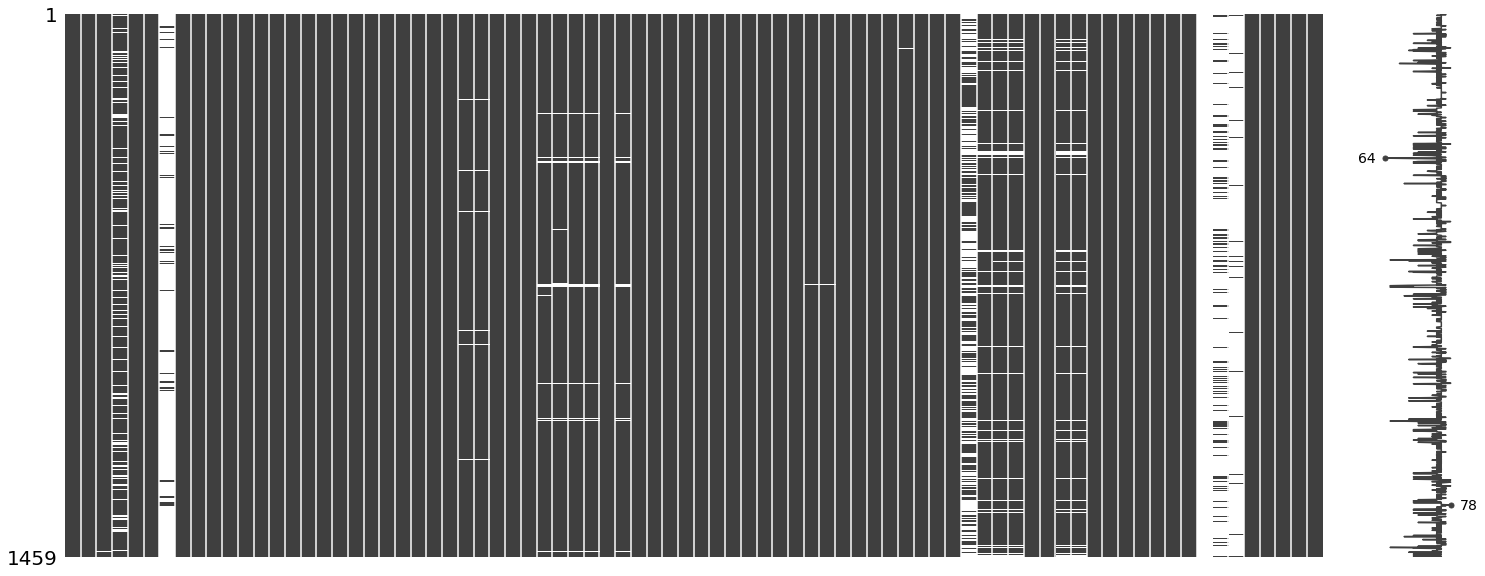

In [ ]:
msno.matrix(test)

In [ ]:
missing_percentage(test)

,Total,Percent
PoolQC,1456,99.79
MiscFeature,1408,96.50
Alley,1352,92.67
Fence,1169,80.12
FireplaceQu,730,50.03
LotFrontage,227,15.56
GarageCond,78,5.35
GarageQual,78,5.35
GarageYrBlt,78,5.35
GarageFinish,78,5.35


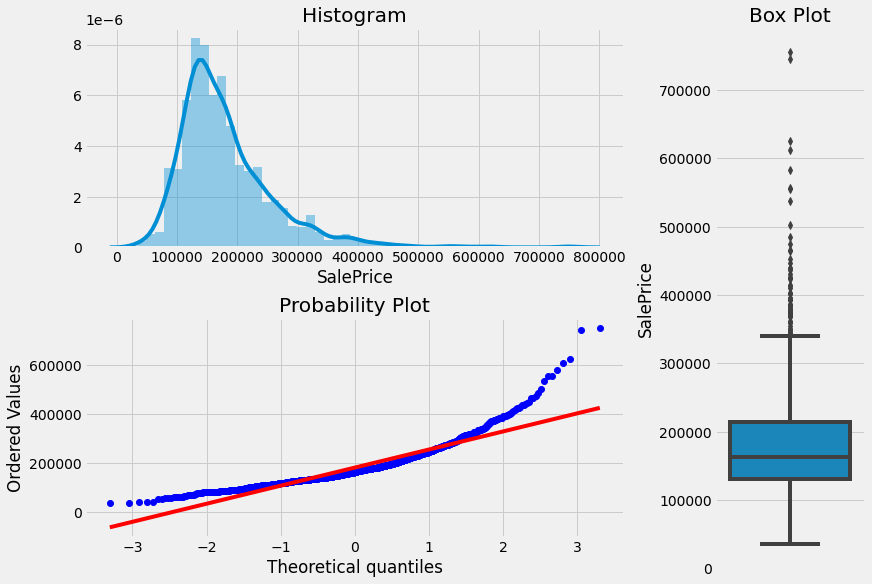

In [ ]:
def plotting_3_chart(df,feathure):
  style.use('fivethirtyeight')
  # 創建圖表、細部設定
  fig=plt.figure(constrained_layout=True,figsize=(12,8))
  grid=gridspec.GridSpec(ncols=3,nrows=3,figure=fig)
  # 長條圖 
  ax1=fig.add_subplot(grid[0,:2])
  ax1.set_title('Histogram')
  sns.distplot(df[feathure],norm_hist=True,ax=ax1)
  # QQ_plot. 
  ax2=fig.add_subplot(grid[1,:2])
  ax2.set_title('QQ_plot')
  stats.probplot(df[feathure],plot=ax2)
  # Box Plot.
  ax3=fig.add_subplot(grid[:,2])
  ax3.set_title('Box Plot')
  sns.boxplot(df[feathure], orient='v', ax=ax3)

plotting_3_chart(train, 'SalePrice')

In [ ]:
# 偏態:常態(0)、右偏(>0)，左偏(<0)
# 峰態:常態(3)，厚尾(>3)，瘦尾(<3)
print(f'Skewness:{train["SalePrice"].skew()}')
print(f'Kurtosis:{train["SalePrice"].kurt()}')

Skewness:1.8828757597682129
Kurtosis:6.536281860064529


In [ ]:
# 特徵&房價 相關係數
(train.corr())["SalePrice"].sort_values(ascending = False)[1:]

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

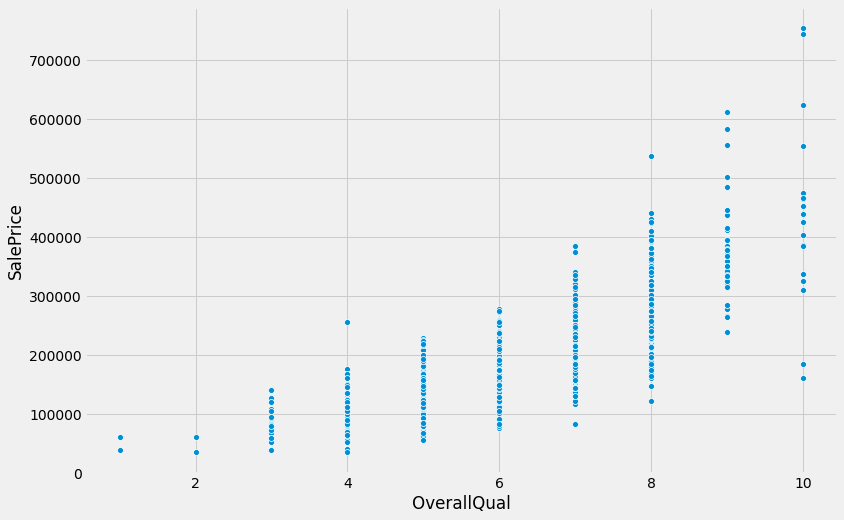

In [ ]:
def customized_scatterplot(y, x):
  # Sizing the plot.
  style.use('fivethirtyeight')
  plt.subplots(figsize = (12,8))
  # Plotting target variable with predictor variable(OverallQual)
  sns.scatterplot(y = y, x = x);

customized_scatterplot(train.SalePrice, train.OverallQual)

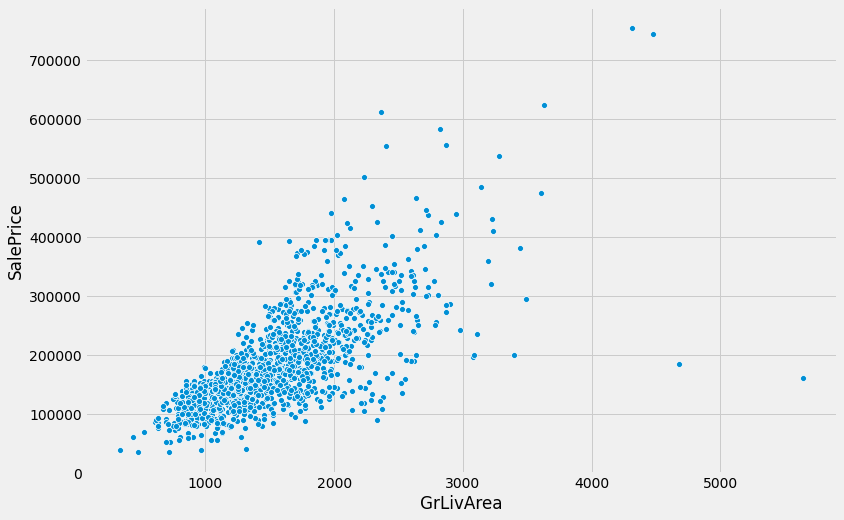

In [ ]:
customized_scatterplot(train.SalePrice, train.GrLivArea)

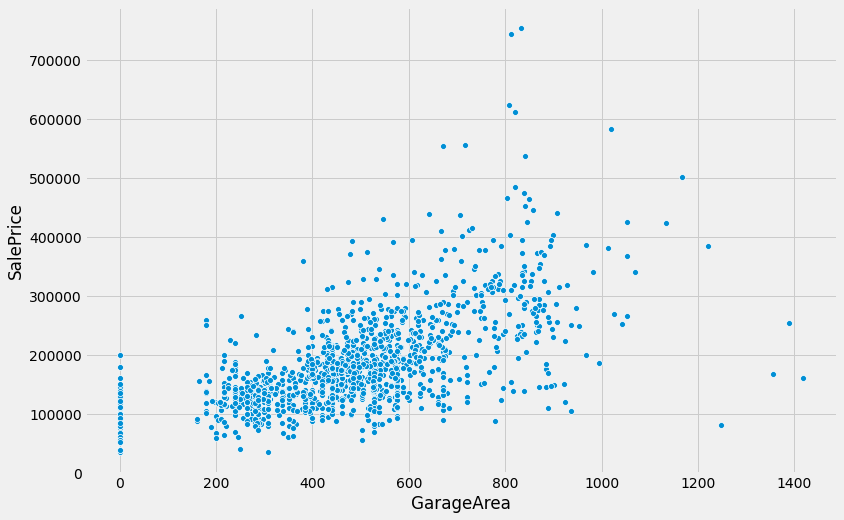

In [ ]:
customized_scatterplot(train.SalePrice, train.GarageArea)

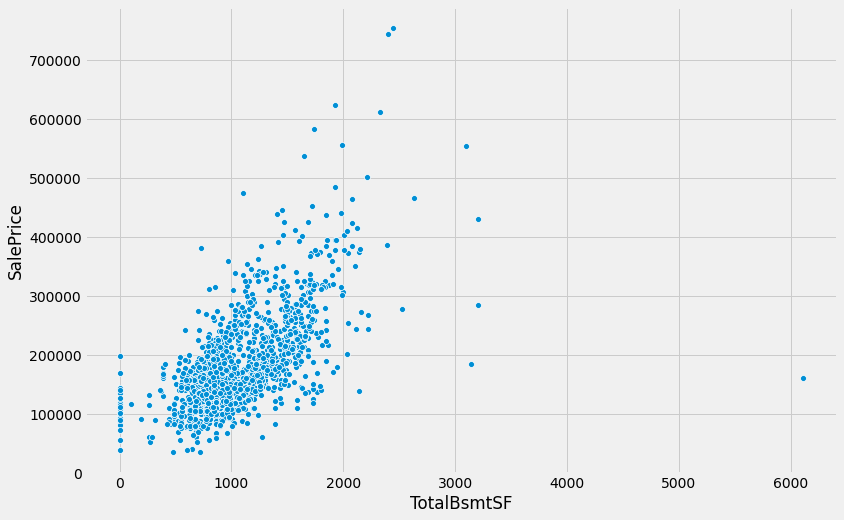

In [ ]:
customized_scatterplot(train.SalePrice, train.TotalBsmtSF)

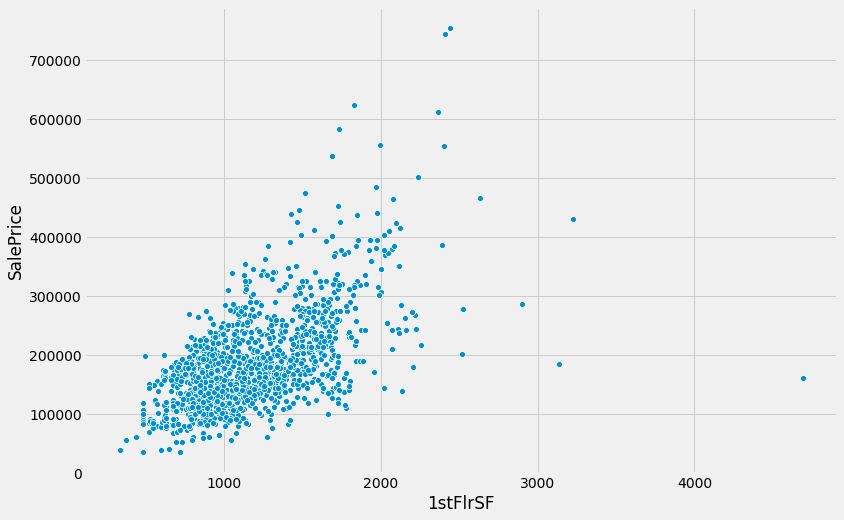

In [ ]:
customized_scatterplot(train.SalePrice, train['1stFlrSF'])

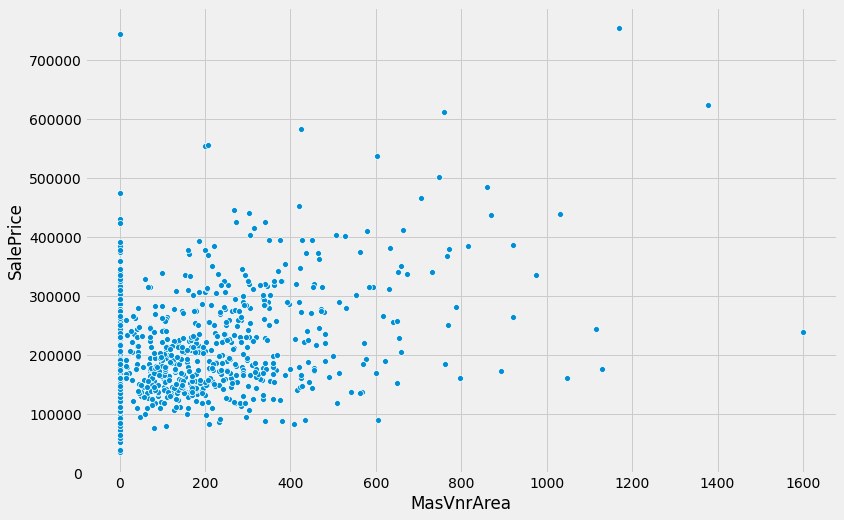

In [ ]:
customized_scatterplot(train.SalePrice, train.MasVnrArea)

In [ ]:
# 訓練資料副本
previous_train = train.copy()

## Deleting those two values with outliers. 
train = train[train.GrLivArea < 4500]
train.reset_index(drop = True, inplace = True)

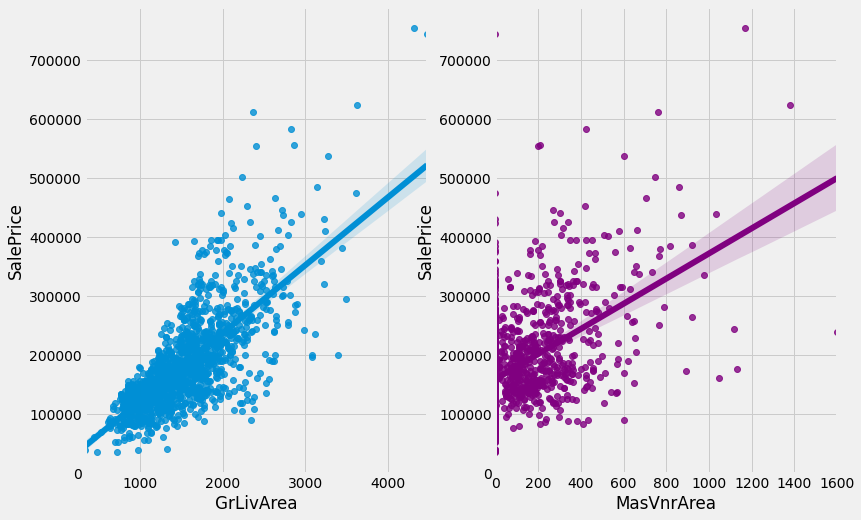

In [ ]:
## Plot sizing. 
fig, (ax1, ax2) = plt.subplots(figsize = (12,8), ncols=2,sharey=False)
# Scatter plotting for SalePrice and GrLivArea. 
# sns.scatterplot( x = train.GrLivArea, y = train.SalePrice,  ax=ax1)
## Putting a regression line. 
sns.regplot(x=train.GrLivArea, y=train.SalePrice, ax=ax1)

# Scatter plotting for SalePrice and MasVnrArea. 
# sns.scatterplot(x = train.MasVnrArea,y = train.SalePrice,color='purple', ax=ax2)
# regression line for MasVnrArea and SalePrice. 
sns.regplot(x=train.MasVnrArea, y=train.SalePrice,color='purple', ax=ax2);

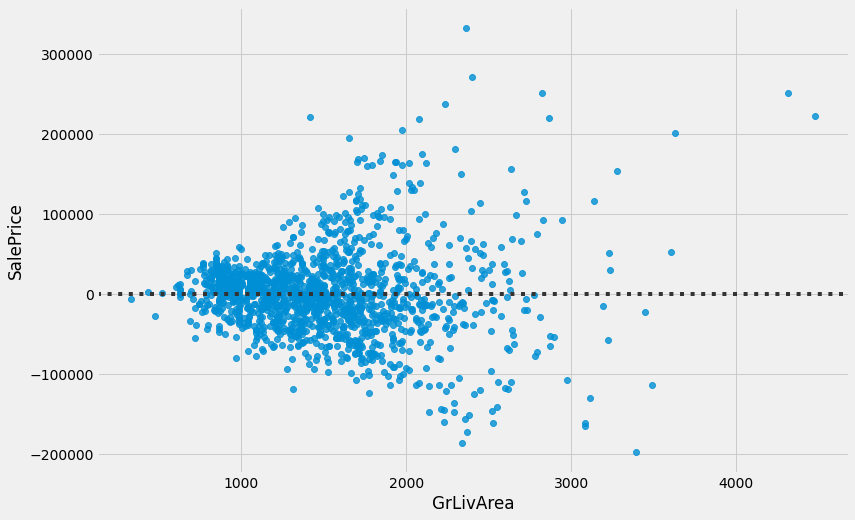

In [ ]:
plt.subplots(figsize = (12,8))
sns.residplot(train.GrLivArea, train.SalePrice)

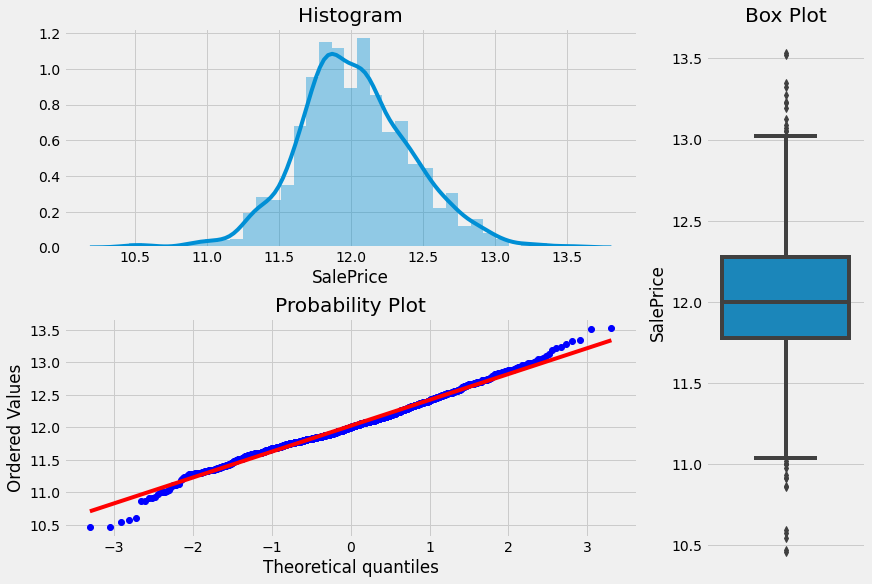

In [ ]:
# 讓變數更符合'常態'
# trainsforming target variable using numpy.log1p, 
train["SalePrice"] = np.log1p(train["SalePrice"])

# Plotting the newly transformed response variable
plotting_3_chart(train, 'SalePrice')

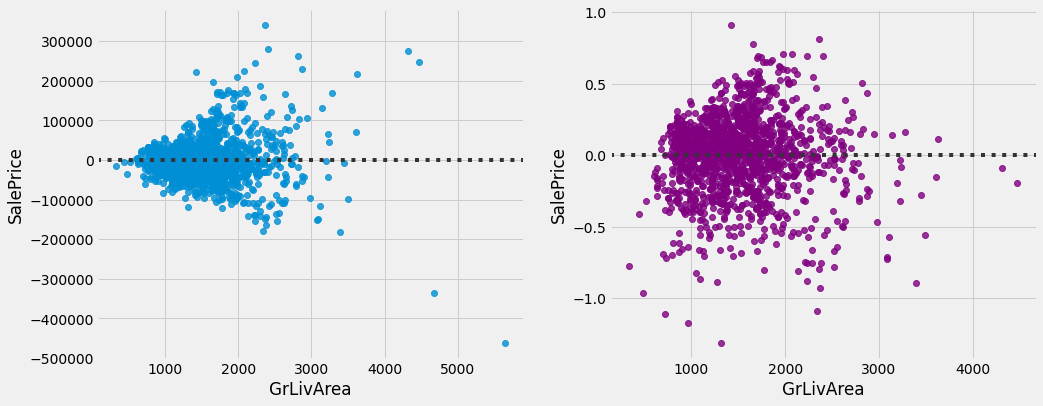

In [ ]:
# Customizing grid for two plots. 
fig, (ax1, ax2) = plt.subplots(figsize = (15,6), 
                               ncols=2, 
                               sharey = False, 
                               sharex=False
                              )
# 轉換前散布圖
sns.residplot(x = previous_train.GrLivArea, y = previous_train.SalePrice, ax = ax1)
# 轉換後散布圖(更加隨機)
sns.residplot(x = train.GrLivArea, y = train.SalePrice, color='purple',ax = ax2);

Text(0.5, 1.0, 'Heatmap of all the Features')

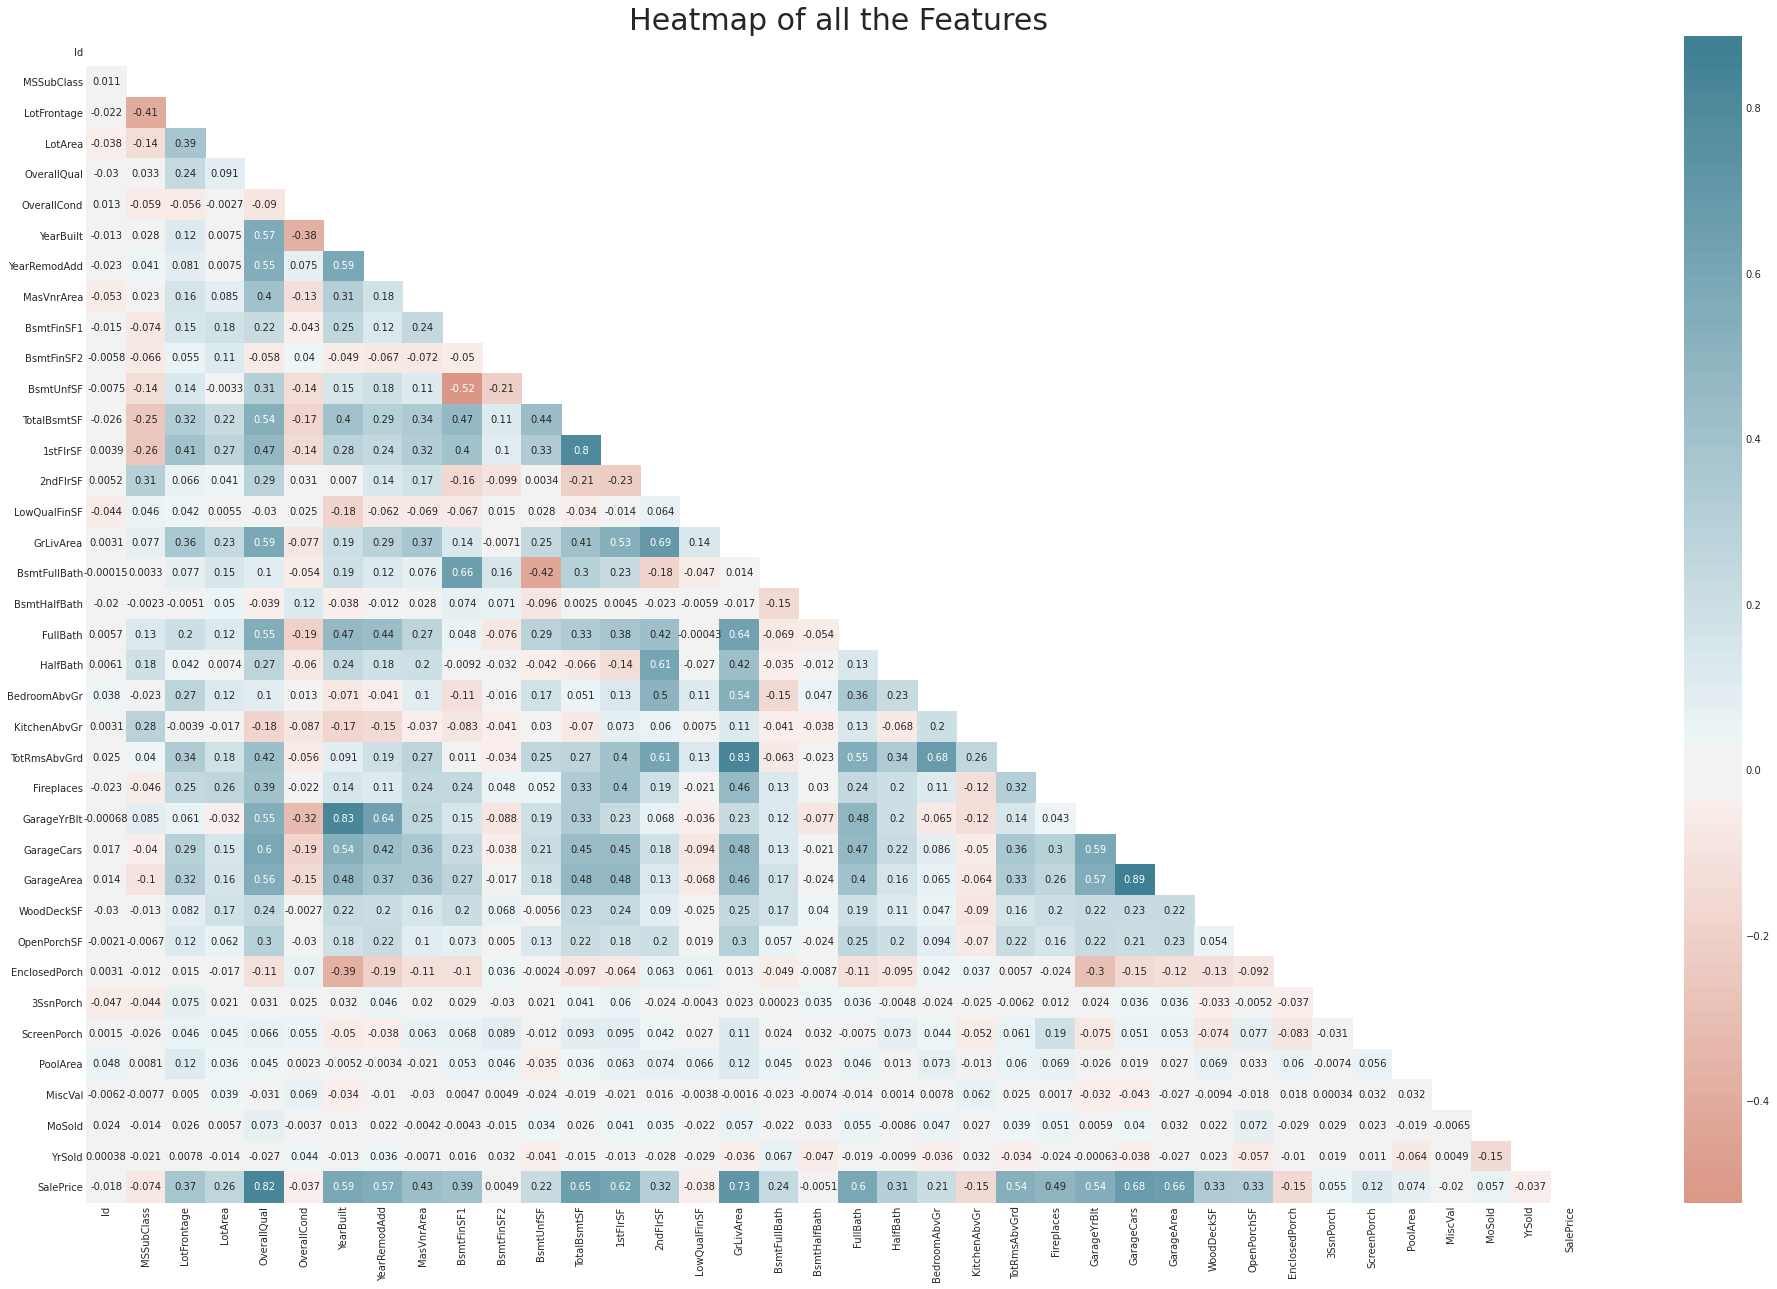

In [ ]:
# Plot fig sizing. 
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,20))
# Plotting heatmap. 

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(train.corr(), 
            cmap=sns.diverging_palette(20, 220, n=200), 
            mask = mask, 
            annot=True, 
            center = 0 
           )
## Give title. 
plt.title("Heatmap of all the Features", fontsize = 30)

In [ ]:
# Dropping the "Id" from train and test set. 
train.drop(columns=['Id'],axis=1, inplace=True)
test.drop(columns=['Id'],axis=1, inplace=True)

# Saving the target values in "y_train". 
y = train['SalePrice'].reset_index(drop=True)

In [ ]:
# 訓練/驗證資料合併處裡
all_data = pd.concat((train, test)).reset_index(drop = True)
# Dropping the target variable. 
all_data.drop(['SalePrice'], axis = 1, inplace = True)

In [ ]:
missing_percentage(all_data)

,Total,Percent
PoolQC,2908,99.69
MiscFeature,2812,96.40
Alley,2719,93.21
Fence,2346,80.43
FireplaceQu,1420,48.68
LotFrontage,486,16.66
GarageCond,159,5.45
GarageQual,159,5.45
GarageYrBlt,159,5.45
GarageFinish,159,5.45


In [ ]:
# Some missing values are intentionally left blank, for example: In the Alley feature 
# there are blank values meaning that there are no alley's in that specific house. 
missing_val_col = ["Alley", 
                   "PoolQC", 
                   "MiscFeature",
                   "Fence",
                   "FireplaceQu",
                   "GarageType",
                   "GarageFinish",
                   "GarageQual",
                   "GarageCond",
                   'BsmtQual',
                   'BsmtCond',
                   'BsmtExposure',
                   'BsmtFinType1',
                   'BsmtFinType2',
                   'MasVnrType']

for i in missing_val_col:
  all_data[i] = all_data[i].fillna('None')

In [ ]:
# In the following features the null values are there for a purpose, so we replace them with "0"
missing_val_col2 = ['BsmtFinSF1',
                    'BsmtFinSF2',
                    'BsmtUnfSF',
                    'TotalBsmtSF',
                    'BsmtFullBath', 
                    'BsmtHalfBath', 
                    'GarageYrBlt',
                    'GarageArea',
                    'GarageCars',
                    'MasVnrArea']

for i in missing_val_col2:
    all_data[i] = all_data[i].fillna(0)

# 以中位數(by neighborhood)取代LotFrontage missing. 
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.median()))

In [ ]:
# Zoning class轉為類別變數 
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
all_data['MSZoning'] = all_data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

# 年、月資料轉類別 
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str) 

In [ ]:
all_data['Functional'] = all_data['Functional'].fillna('Typ') 
all_data['Utilities'] = all_data['Utilities'].fillna('AllPub') 
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0]) 
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna("TA") 
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna("SBrkr") 

In [ ]:
missing_percentage(all_data)

,Total,Percent


In [ ]:
numeric_feats = all_data.dtypes[all_data.dtypes != object].index
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
skewed_feats

MiscVal          21.939672
PoolArea         17.688664
LotArea          13.109495
LowQualFinSF     12.084539
3SsnPorch        11.372080
KitchenAbvGr      4.300550
BsmtFinSF2        4.144503
EnclosedPorch     4.002344
ScreenPorch       3.945101
BsmtHalfBath      3.929996
MasVnrArea        2.621719
OpenPorchSF       2.529358
WoodDeckSF        1.844792
1stFlrSF          1.257286
GrLivArea         1.068750
LotFrontage       1.058803
BsmtFinSF1        0.980645
BsmtUnfSF         0.919688
2ndFlrSF          0.861556
TotRmsAbvGrd      0.749232
Fireplaces        0.725278
HalfBath          0.696666
TotalBsmtSF       0.671751
BsmtFullBath      0.622415
OverallCond       0.569314
BedroomAbvGr      0.326568
GarageArea        0.216857
OverallQual       0.189591
FullBath          0.165514
GarageCars       -0.219297
YearRemodAdd     -0.450134
YearBuilt        -0.599194
GarageYrBlt      -3.904632
dtype: float64

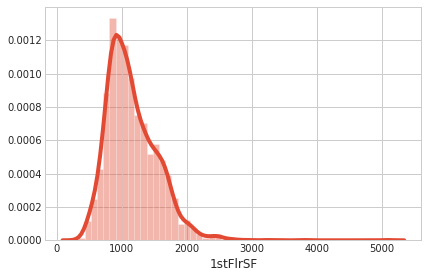

In [ ]:
sns.distplot(all_data['1stFlrSF'])

In [ ]:
# 對變數進行Box-Cox轉換以貼近常態
def fixing_skewness(df):
    """
    This function takes in a dataframe and return fixed skewed dataframe
    """
    ## Getting all the data that are not of "object" type. 
    numeric_feats = df.dtypes[df.dtypes != "object"].index

    # Check the skew of all numerical features
    skewed_feats = df[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
    high_skew = skewed_feats[abs(skewed_feats) > 0.5]
    skewed_features = high_skew.index

    for feat in skewed_features:
        df[feat] = boxcox1p(df[feat], boxcox_normmax(df[feat] + 1))

fixing_skewness(all_data)

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:3538: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


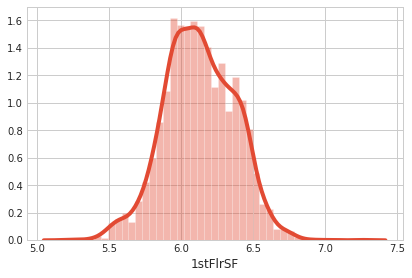

In [ ]:
sns.distplot(all_data['1stFlrSF']);

In [ ]:
# feture engineering a new feature "TotalFS"
all_data['TotalSF'] = (all_data['TotalBsmtSF']+ 
                       all_data['1stFlrSF']+ 
                       all_data['2ndFlrSF'])

all_data['YrBltAndRemod'] = all_data['YearBuilt'] + all_data['YearRemodAdd']

all_data['Total_sqr_footage'] = (all_data['BsmtFinSF1']+
                                 all_data['BsmtFinSF2']+
                                 all_data['1stFlrSF']+
                                 all_data['2ndFlrSF']
                                 )
                                 

all_data['Total_Bathrooms'] = (all_data['FullBath']+
                               (0.5 * all_data['HalfBath'])+
                               all_data['BsmtFullBath']+
                               (0.5 * all_data['BsmtHalfBath'])
                              )
                               

all_data['Total_porch_sf'] = (all_data['OpenPorchSF']+
                              all_data['3SsnPorch']+
                              all_data['EnclosedPorch']+ 
                              all_data['ScreenPorch']+
                              all_data['WoodDeckSF']
                             )

In [ ]:
all_data['haspool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['has2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasbsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
all_data.shape

(2917, 89)

In [ ]:
# 太多空值或單一值
all_data = all_data.drop(['Utilities', 'Street', 'PoolQC',], axis=1)

In [ ]:
# dummy variable
final_features = pd.get_dummies(all_data).reset_index(drop=True)
final_features.shape

(2917, 333)

In [ ]:
X = final_features.iloc[:len(y), :]
X_sub = final_features.iloc[len(y):, :]

In [ ]:
# 棄掉outlier(來自討論串)
outliers = [30, 88, 462, 631, 1322]
X = X.drop(X.index[outliers])
y = y.drop(y.index[outliers])

In [ ]:
# 刪掉單一值數量大於99.94%的特徵
def overfit_reducer(df):
    """
    This function takes in a dataframe and returns a list of features that are overfitted.
    """
    overfit = []
    for i in df.columns:
        counts = df[i].value_counts()
        zeros = counts.iloc[0]
        if zeros / len(df) * 100 > 99.94:
            overfit.append(i)
    overfit = list(overfit)
    return overfit


overfitted_features = overfit_reducer(X)

X = X.drop(overfitted_features, axis=1)
X_sub = X_sub.drop(overfitted_features, axis=1)

In [ ]:
X.shape,y.shape, X_sub.shape

((1453, 332), (1453,), (1459, 332))

In [ ]:
# Train test split follows this distinguished code pattern and helps creating train and test set to build machine learning. 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state = 42)

In [ ]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

In [ ]:
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [ ]:
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, 
                                              alphas=alphas2, 
                                              random_state=42, 
                                              cv=kfolds))
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))                                
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

In [ ]:
rf = RandomForestRegressor(n_estimators=500,
                           max_depth=13,
                           min_samples_split=50,
                           min_samples_leaf=15,
                           max_features='auto',
                           random_state=42)
rf=make_pipeline(RobustScaler(), rf)

gbr = GradientBoostingRegressor(n_estimators=3000, 
                                learning_rate=0.05,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state =42)
lightgbm = LGBMRegressor(objective='regression', 
                         num_leaves=4,
                         learning_rate=0.01, 
                         n_estimators=5000,
                         max_bin=200, 
                         bagging_fraction=0.75,
                         bagging_freq=5, 
                         bagging_seed=7,
                         feature_fraction=0.2,
                         feature_fraction_seed=7,
                         verbose=-1
                         )
xgboost = XGBRegressor(objective='reg:squarederror',
                       learning_rate=0.01,n_estimators=3460,
                       max_depth=3, min_child_weight=0,
                       gamma=0, subsample=0.7,
                       colsample_bytree=0.7,
                       nthread=-1,
                       scale_pos_weight=1, seed=42,
                       reg_alpha=0.00006)
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, xgboost, lightgbm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [ ]:
params={'randomforestregressor__min_samples_leaf':range(10,60,10), 'randomforestregressor__min_samples_split':range(30,80,10)}
bestreg=GridSearchCV(estimator=rf, param_grid=params, cv=kfolds, scoring='neg_mean_squared_error')
bestreg.fit(X, y)
print(bestreg.best_params_, bestreg.best_score_)

In [ ]:
score = cv_rmse(ridge)
print("Ridge: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lasso)
print("LASSO: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(elasticnet)
print("elastic net: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lightgbm)
print("lightgbm: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

# score = cv_rmse(gbr)
# print("gbr: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

print('START Fit')

print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(X), np.array(y))

print('elasticnet')
elastic_model_full_data = elasticnet.fit(X, y)

print('Lasso')
lasso_model_full_data = lasso.fit(X, y)

print('Ridge') 
ridge_model_full_data = ridge.fit(X, y)

print('Svr')
svr_model_full_data = svr.fit(X, y)

# print('GradientBoosting')
# gbr_model_full_data = gbr.fit(X, y)

print('xgboost')
xgb_model_full_data = xgboost.fit(X, y)

print('lightgbm')
lgb_model_full_data = lightgbm.fit(X, y)

Ridge: 0.1019 (0.0086)
 2020-09-06 03:08:43.203798
LASSO: 0.1007 (0.0087)
 2020-09-06 03:08:54.073836
elastic net: 0.1006 (0.0087)
 2020-09-06 03:10:01.649082
SVR: 0.1014 (0.0094)
 2020-09-06 03:10:14.545119
lightgbm: 0.1069 (0.0109)
 2020-09-06 03:10:32.099358
xgboost: 0.1062 (0.0103)
 2020-09-06 03:14:33.434926
START Fit
stack_gen
elasticnet
Lasso
Ridge
Svr
xgboost
lightgbm


In [ ]:
def blend_models_predict(X):
    return ((0.1 * elastic_model_full_data.predict(X)) +
            (0.05 * lasso_model_full_data.predict(X)) + 
            (0.2 * ridge_model_full_data.predict(X)) +
            (0.1 * svr_model_full_data.predict(X)) + 
#             (0.1 * gbr_model_full_data.predict(X)) + 
            (0.15 * xgb_model_full_data.predict(X)) + 
            (0.1 * lgb_model_full_data.predict(X)) +
            (0.3 * stack_gen_model.predict(np.array(X))))
print('RMSE score on train data:')
print(rmse(y, blend_models_predict(X)))

RMSE score on train data:
0.06342683770607187


In [ ]:
print('Predict submission', datetime.now())
submission = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Kaggle/House Prices_Advanced Regression Techniques/data/sample_submission.csv')
submission['SalePrice']=np.floor(np.expm1(blend_models_predict(X_sub)))
submission.to_csv('/content/drive/My Drive/Colab Notebooks/Kaggle/House Prices_Advanced Regression Techniques/data/submit.csv',index=False)

#補充:自訂義XGboost&Lightgbm損失函數
https://zhuanlan.zhihu.com/p/148838129